In [1]:
#Importar librerías

import warnings
warnings.filterwarnings('ignore')

import regex as re

import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Importa csv
train=pd.read_csv('data/train.csv')

In [3]:
#Printea sample de DataFrame
train

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.00
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.80
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.00


In [4]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 780.0 KB


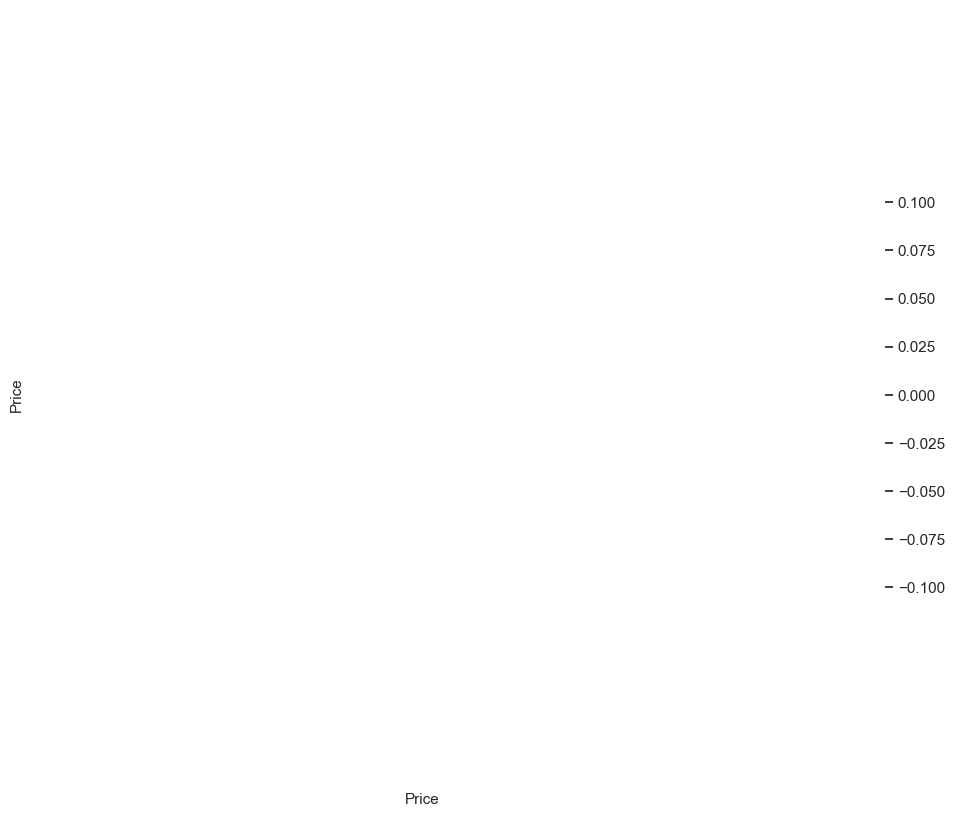

In [5]:
#Analiza colinealidad o si es posible analizar debido al gran número de columnas categóricas

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train.corr(),
           mask=mask,
          cmap='rainbow',
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [6]:
#Quita KG
train['Weight'] = train['Weight'].str.replace('kg', '')

#Convierte la columna a ordinal
train['Weight'] = pd.to_numeric(train['Weight'])

train['Weight'].sample(20)


572    1.95
318    1.95
941    2.80
939    4.36
274    2.20
976    1.70
956    1.24
33     1.20
834    1.32
308    2.30
117    2.16
42     2.30
414    1.27
447    2.23
808    2.62
216    2.80
85     2.65
193    2.80
192    1.30
550    2.20
Name: Weight, dtype: float64

In [7]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(2), object(11)
memory usage: 728.1 KB


In [8]:
#Renombrar columna
train.rename(columns={' Storage': 'Storage'}, inplace=True)

In [9]:
# Extrace valores numericos. Valor bajo = SSD, medio = Hybrid, alto = HDD.
train['Storage'] = train['Storage'].str.extract('(\d+)').astype(int)

train['Storage']

0      128
1      128
2      256
3      512
4      256
      ... 
972    256
973    256
974    256
975    128
976    508
Name: Storage, Length: 977, dtype: int32

In [10]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7   Storage                   977 non-null    int32  
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(2), int32(1), object(10)
memory usage: 667.1 KB


In [11]:
# Extrace valores numericos de RAM. Capacidad en GB.
train['RAM'] = train['RAM'].str.extract('(\d+)').astype(int)

train['RAM']

0       8
1       8
2       8
3      16
4       8
       ..
972    32
973     8
974    16
975     8
976     4
Name: RAM, Length: 977, dtype: int32

In [12]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    int32  
 7   Storage                   977 non-null    int32  
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    float64
 12  Price                     977 non-null    float64
dtypes: float64(2), int32(2), object(9)
memory usage: 613.5 KB


In [13]:
train.GPU.value_counts()

Intel HD Graphics 620             225
Intel HD Graphics 520              98
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            57
AMD Radeon 530                     37
                                 ... 
Nvidia GeForce GTX 960<U+039C>      1
Intel Graphics 620                  1
Nvidia GeForce GTX 960              1
AMD Radeon R5 520                   1
AMD Radeon R9 M385                  1
Name: GPU, Length: 98, dtype: int64

In [14]:
train['GPU'] = train['GPU'].str.split().str[0]

train['GPU']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
972    Nvidia
973     Intel
974    Nvidia
975    Nvidia
976     Intel
Name: GPU, Length: 977, dtype: object

In [15]:
train.CPU.value_counts()

Intel Core i5 7200U 2.5GHz     151
Intel Core i7 7700HQ 2.8GHz    123
Intel Core i7 7500U 2.7GHz     103
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
Intel Core i7 2.9GHz             1
AMD E-Series 7110 1.8GHz         1
Intel Core i5 2.9GHz             1
Intel Core M m3 1.2GHz           1
Intel Core i5 7200U 2.70GHz      1
Name: CPU, Length: 106, dtype: int64

In [16]:
with open('data/message.txt', "r") as file:
    contenido=file.read()
dictio={i.split(':')[0]:i.split(':')[1].split() for i in contenido.replace('    ','').replace(',','').replace("'",'').replace(')','').replace('(','').split('\n')}

In [17]:
train['CPU_Frecuencia']=train['CPU'].apply(lambda x : ''.join(x.split()[-1])).str.replace('GHz','').astype(float)
train['CPU_Nucleos']=train['CPU'].apply(lambda x:dictio[x][0]).astype(int)

In [18]:
train.drop('CPU', axis=1, inplace=True)

In [19]:
#Dejar solo valor numérico en Screen Size
train['Screen Size'] = train['Screen Size'].str.replace('"', '').astype(float)
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    float64
 4   Screen                    977 non-null    object 
 5   RAM                       977 non-null    int32  
 6   Storage                   977 non-null    int32  
 7   GPU                       977 non-null    object 
 8   Operating System          977 non-null    object 
 9   Operating System Version  841 non-null    object 
 10  Weight                    977 non-null    float64
 11  Price                     977 non-null    float64
 12  CPU_Frecuencia            977 non-null    float64
 13  CPU_Nucleos               977 non-null    int32  
dtypes: float64

In [20]:
train['Screen Size'].value_counts()

15.6    494
14.0    146
17.3    131
13.3    123
11.6     27
12.5     23
13.5      6
13.9      6
15.4      4
12.3      4
12.0      3
15.0      3
13.0      2
10.1      1
18.4      1
17.0      1
14.1      1
11.3      1
Name: Screen Size, dtype: int64

In [21]:
train['Screen'] = train['Screen'].str.rsplit(' ', 1).str[-1]
train.Screen.value_counts()


1920x1080    655
1366x768     206
3840x2160     36
1600x900      19
3200x1800     15
2560x1440     15
2560x1600      6
2256x1504      6
1440x900       4
2880x1800      4
2304x1440      3
2400x1600      3
1920x1200      2
2160x1440      2
2736x1824      1
Name: Screen, dtype: int64

In [22]:
#Separar valores para multiplicar después.
train[['Width', 'Height']] = train['Screen'].str.extract(r'(\d+)x(\d+)', expand=True)
#Pasar a ordinal
train['Width'] = pd.to_numeric(train['Width'])
train['Height'] = pd.to_numeric(train['Height'])
#Pasar Screen a ordinal con total de pixeles
train['Screen'] = train['Width'] * train['Height']
train.drop(['Width', 'Height'], axis=1, inplace=True)
train.Screen.value_counts()


2073600    655
1049088    206
8294400     36
1440000     19
5760000     15
3686400     15
4096000      6
3393024      6
1296000      4
5184000      4
3317760      3
3840000      3
2304000      2
3110400      2
4990464      1
Name: Screen, dtype: int64

In [23]:
train

,Manufacturer,Model Name,Category,Screen Size,Screen,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,CPU_Frecuencia,CPU_Nucleos
0,Apple,MacBook Pro,Ultrabook,13.3,4096000,8,128,Intel,macOS,NaN,1.37,11912523.48,2.3,2
1,Apple,Macbook Air,Ultrabook,13.3,1296000,8,128,Intel,macOS,NaN,1.34,7993374.48,1.8,2
2,HP,250 G6,Notebook,15.6,2073600,8,256,Intel,No OS,NaN,1.86,5112900.00,2.5,2
3,Apple,MacBook Pro,Ultrabook,15.4,5184000,16,512,AMD,macOS,NaN,1.83,22563005.40,2.7,4
4,Apple,MacBook Pro,Ultrabook,13.3,4096000,8,256,Intel,macOS,NaN,1.37,16037611.20,3.1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.3,2073600,32,256,Nvidia,Windows,10,4.42,24897600.00,2.6,4
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0,2073600,8,256,Intel,Windows,10,1.95,10492560.00,2.3,2
974,Asus,Rog Strix,Gaming,17.3,2073600,16,256,Nvidia,Windows,10,2.73,18227710.80,2.8,4
975,HP,Probook 450,Notebook,15.6,2073600,8,128,Nvidia,Windows,10,2.04,8705268.00,2.7,2


In [24]:
train[train['Model Name'] == '250 G6']


,Manufacturer,Model Name,Category,Screen Size,Screen,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,CPU_Frecuencia,CPU_Nucleos
2,HP,250 G6,Notebook,15.6,2073600,8,256,Intel,No OS,NaN,1.86,5112900.00,2.5,2
10,HP,250 G6,Notebook,15.6,1049088,4,500,Intel,No OS,NaN,1.86,3502558.80,2.5,2
11,HP,250 G6,Notebook,15.6,2073600,4,500,Intel,No OS,NaN,1.86,3067651.08,2.0,2
38,HP,250 G6,Notebook,15.6,1049088,4,1,Intel,Windows,10,1.86,4345431.48,2.5,2
64,HP,250 G6,Notebook,15.6,2073600,8,256,Intel,Windows,10,1.86,6135480.00,2.5,2
66,HP,250 G6,Notebook,15.6,1049088,4,500,AMD,Windows,10,1.86,3900831.48,2.0,2
87,HP,250 G6,Notebook,15.6,2073600,8,256,Intel,Windows,10,1.96,5326219.08,2.5,2
125,HP,250 G6,Notebook,15.6,1049088,4,500,Intel,No OS,NaN,1.86,2303028.00,1.6,2
309,HP,250 G6,Notebook,15.6,2073600,4,1,Intel,Windows,10,1.86,4170348.00,2.0,2
360,HP,250 G6,Notebook,15.6,1049088,4,500,Intel,Windows,10,1.86,3903588.00,2.0,2


In [25]:
#Tiro la columna OS Version porque no me parece que afecte el precio desde el estudio del problema
train.drop('Operating System Version', axis=1, inplace=True)


In [26]:
train.sample(5)

,Manufacturer,Model Name,Category,Screen Size,Screen,RAM,Storage,GPU,Operating System,Weight,Price,CPU_Frecuencia,CPU_Nucleos
333,Lenovo,V310-15ISK (i3-6006U/4GB/1TB/FHD/W10),Notebook,15.6,2073600,4,1,Intel,Windows,1.85,3992508.0,2.0,2
188,Acer,Swift 7,Ultrabook,13.3,2073600,8,256,Intel,Windows,1.12,8794188.0,1.2,2
96,Dell,Inspiron 3567,Notebook,15.6,2073600,8,1,AMD,Linux,2.20,5334310.8,2.7,2
284,Acer,Aspire A517-51G,Notebook,15.6,2073600,8,256,Nvidia,Windows,3.00,8456292.0,1.8,4
306,HP,EliteBook x360,2 in 1 Convertible,13.3,2073600,16,256,Intel,Windows,1.28,17561700.0,2.8,2


In [27]:
train['Operating System'].value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: Operating System, dtype: int64

In [28]:
train['Operating System'] = train['Operating System'].replace("Mac OS", "macOS")

In [29]:
train['Operating System'].value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         17
Android        1
Name: Operating System, dtype: int64

In [30]:
#Creo Labels en nuevo dataframe para testear después colinealidad
train_labels=train
train_labels['Operating System'] = train_labels['Operating System'].astype('category').cat.codes
train_labels.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Model Name        977 non-null    object 
 2   Category          977 non-null    object 
 3   Screen Size       977 non-null    float64
 4   Screen            977 non-null    int64  
 5   RAM               977 non-null    int32  
 6   Storage           977 non-null    int32  
 7   GPU               977 non-null    object 
 8   Operating System  977 non-null    int8   
 9   Weight            977 non-null    float64
 10  Price             977 non-null    float64
 11  CPU_Frecuencia    977 non-null    float64
 12  CPU_Nucleos       977 non-null    int32  
dtypes: float64(4), int32(3), int64(1), int8(1), object(4)
memory usage: 300.3 KB


In [31]:
#Creo Labels en nuevo dataframe para testear después colinealidad
train_labels=train
train_labels['Category'] = train_labels['Category'].astype('category').cat.codes
train_labels.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Model Name        977 non-null    object 
 2   Category          977 non-null    int8   
 3   Screen Size       977 non-null    float64
 4   Screen            977 non-null    int64  
 5   RAM               977 non-null    int32  
 6   Storage           977 non-null    int32  
 7   GPU               977 non-null    object 
 8   Operating System  977 non-null    int8   
 9   Weight            977 non-null    float64
 10  Price             977 non-null    float64
 11  CPU_Frecuencia    977 non-null    float64
 12  CPU_Nucleos       977 non-null    int32  
dtypes: float64(4), int32(3), int64(1), int8(2), object(3)
memory usage: 238.5 KB


In [32]:
#Creo Labels en nuevo dataframe para testear después colinealidad
train_labels=train
train_labels['Model Name'] = train_labels['Model Name'].astype('category').cat.codes
train_labels.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Model Name        977 non-null    int16  
 2   Category          977 non-null    int8   
 3   Screen Size       977 non-null    float64
 4   Screen            977 non-null    int64  
 5   RAM               977 non-null    int32  
 6   Storage           977 non-null    int32  
 7   GPU               977 non-null    object 
 8   Operating System  977 non-null    int8   
 9   Weight            977 non-null    float64
 10  Price             977 non-null    float64
 11  CPU_Frecuencia    977 non-null    float64
 12  CPU_Nucleos       977 non-null    int32  
dtypes: float64(4), int16(1), int32(3), int64(1), int8(2), object(2)
memory usage: 171.2 KB


In [33]:
#Creo Labels en nuevo dataframe para testear después colinealidad
train_labels=train
train_labels['Manufacturer'] = train_labels['Manufacturer'].astype('category').cat.codes
train_labels.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    int8   
 1   Model Name        977 non-null    int16  
 2   Category          977 non-null    int8   
 3   Screen Size       977 non-null    float64
 4   Screen            977 non-null    int64  
 5   RAM               977 non-null    int32  
 6   Storage           977 non-null    int32  
 7   GPU               977 non-null    object 
 8   Operating System  977 non-null    int8   
 9   Weight            977 non-null    float64
 10  Price             977 non-null    float64
 11  CPU_Frecuencia    977 non-null    float64
 12  CPU_Nucleos       977 non-null    int32  
dtypes: float64(4), int16(1), int32(3), int64(1), int8(3), object(1)
memory usage: 113.7 KB


In [34]:
#Creo Labels en nuevo dataframe para testear después colinealidad
train_labels=train
train_labels['GPU'] = train_labels['GPU'].astype('category').cat.codes
train_labels.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    int8   
 1   Model Name        977 non-null    int16  
 2   Category          977 non-null    int8   
 3   Screen Size       977 non-null    float64
 4   Screen            977 non-null    int64  
 5   RAM               977 non-null    int32  
 6   Storage           977 non-null    int32  
 7   GPU               977 non-null    int8   
 8   Operating System  977 non-null    int8   
 9   Weight            977 non-null    float64
 10  Price             977 non-null    float64
 11  CPU_Frecuencia    977 non-null    float64
 12  CPU_Nucleos       977 non-null    int32  
dtypes: float64(4), int16(1), int32(3), int64(1), int8(4)
memory usage: 55.5 KB


In [35]:
train_labels.sample(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,RAM,Storage,GPU,Operating System,Weight,Price,CPU_Frecuencia,CPU_Nucleos
809,10,154,3,15.6,2073600,4,1,2,4,2.40,5415228.0,2.5,2
506,2,479,3,15.6,2073600,8,256,1,4,2.00,10883808.0,2.7,2
380,7,254,1,17.3,2073600,8,128,2,4,3.35,10590372.0,2.8,4
693,10,367,0,14.0,3686400,8,256,1,4,1.42,23030280.0,2.7,2
337,7,89,3,15.6,2073600,8,256,1,4,1.84,10172448.0,2.5,2
828,0,66,2,11.6,1049088,4,32,1,1,1.35,3156660.0,1.6,2
824,10,367,4,14.0,2073600,8,256,1,4,1.13,16672500.0,2.5,2
22,7,39,3,15.6,1049088,4,500,0,3,1.86,2294136.0,1.5,2
797,4,217,3,15.6,1049088,8,128,1,4,1.95,7202520.0,2.5,2
772,16,340,3,14.0,1049088,4,128,1,4,1.75,9069840.0,2.3,2


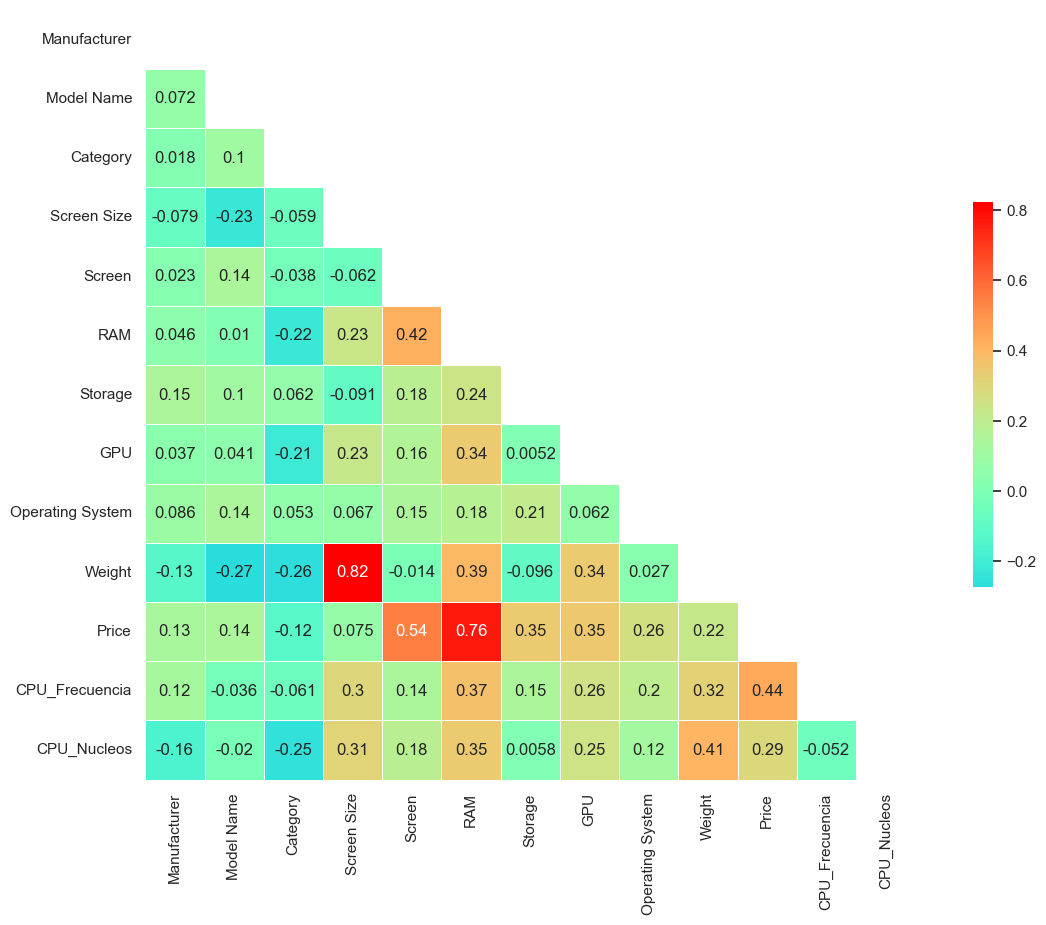

In [36]:
#Analiza colinealidad o si es posible analizar debido al gran número de columnas categóricas. AHORA QUE ES NUMÉRICO SI!

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train_labels.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train_labels.corr(),
           mask=mask,
          cmap='rainbow',
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [37]:
# Your response here. 
import statsmodels.api as sm

# Esplitea el dataframe
X = sm.add_constant(train_labels[['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen', 'RAM', 'Storage', 'GPU', 'Operating System', 'Weight', 'CPU_Frecuencia', 'CPU_Nucleos']])
y = train_labels['Price']

# Crea el modelo OLS y entrena
modelo_ols = sm.OLS(y, X).fit()

# Predice el modelo
pred_ols=modelo_ols.predict(X)

# Printea sumario del modelo
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     214.6
Date:                Mon, 29 May 2023   Prob (F-statistic):          2.64e-262
Time:                        15:45:41   Log-Likelihood:                -16047.
No. Observations:                 977   AIC:                         3.212e+04
Df Residuals:                     964   BIC:                         3.218e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.527e+05   1.67e+06      0.391      0.696   -2.63e+06    3.93e+06
Manufacturer      9.837e+04   2.65e+04      3.719      0.000    4.65e+04     1.5e+05
Model Name        3143.0147    841.691      3.734      0.000    1491.257    4794.773
Category          2.835e+05   9.53e+04      2.974      0.003    9.64e+04    4.71e+05
Screen Size      -9.035e+05    1.4e+05     -6.438      0.000   -1.18e+06   -6.28e+05
Screen               1.0035      0.086     11.635      0.000       0.834       1.173
RAM                6.41e+05   2.91e+04     22.058      0.000    5.84e+05    6.98e+05
Storage           4200.2603    667.366      6.294      0.000    2890.602    5509.918
GPU               7.016e+05   1.82e+05      3.859      0.000    3.45e+05    1.06e+06
Operating System  5.216e+05    1.7e+05      3.074      0.002    1.89e+05    8.55e+05
Weight            1.148e+06   3.37e+05      3.404      0.001    4.86e+05    1.81e+06
CPU_Frecuencia    2.355e+06   2.43e+05      9.698      0.000    1.88e+06    2.83e+06
CPU_Nucleos       5.957e+05   1.26e+05      4.741      0.000    3.49e+05    8.42e+05
==============================================================================
Omnibus:                      250.063   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1333.699
Skew:                           1.066   Prob(JB):                    2.46e-290
Kurtosis:                       8.312   Cond. No.                     4.16e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
train_labels.drop(['Manufacturer', 'Model Name', 'Category', 'Screen Size'], axis=1, inplace=True)

In [39]:
train_labels.sample(10)

,Screen,RAM,Storage,GPU,Operating System,Weight,Price,CPU_Frecuencia,CPU_Nucleos
198,2073600,16,256,2,4,3.35,12262068.0,2.8,4
615,2073600,8,128,2,4,3.00,10385856.0,2.8,4
520,2073600,8,256,2,4,3.20,12439908.0,2.8,4
412,2073600,4,1,0,4,2.10,4170348.0,2.0,2
145,2073600,8,256,1,4,1.25,9772308.0,1.8,4
764,1049088,4,500,1,4,1.65,7549308.0,2.0,2
654,1049088,4,500,1,3,1.86,3244690.8,2.0,2
208,2073600,8,256,1,4,1.20,12884508.0,1.8,4
199,2073600,8,256,2,4,2.50,9292140.0,1.8,4
382,2073600,8,128,2,4,2.30,14716260.0,2.8,4


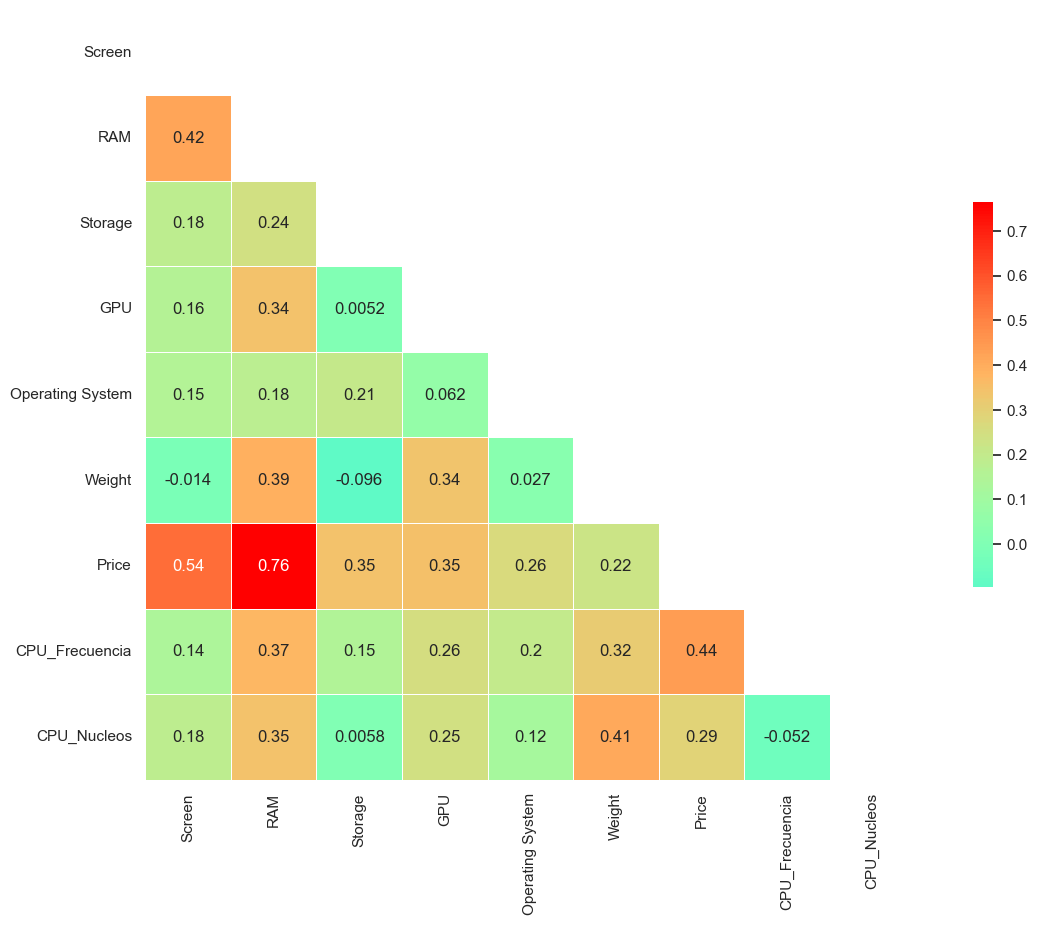

In [40]:
#Analiza colinealidad o si es posible analizar debido al gran número de columnas categóricas. De nuevo.
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train_labels.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train_labels.corr(),
           mask=mask,
          cmap='rainbow',
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [41]:
# Your response here. 
import statsmodels.api as sm

# Esplitea el dataframe
X = sm.add_constant(train_labels[['Screen', 'RAM', 'Storage', 'GPU', 'Operating System', 'Weight', 'CPU_Frecuencia', 'CPU_Nucleos']])
y = train_labels['Price']

# Crea el modelo OLS y entrena
modelo_ols = sm.OLS(y, X).fit()

# Predice el modelo
pred_ols=modelo_ols.predict(X)

# Printea sumario del modelo
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     293.4
Date:                Mon, 29 May 2023   Prob (F-statistic):          1.12e-252
Time:                        15:45:42   Log-Likelihood:                -16081.
No. Observations:                 977   AIC:                         3.218e+04
Df Residuals:                     968   BIC:                         3.222e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.954e+06    8.1e+05     -8.584      0.000   -8.54e+06   -5.36e+06
Screen               1.0369      0.089     11.680      0.000       0.863       1.211
RAM               6.714e+05   2.95e+04     22.784      0.000    6.14e+05    7.29e+05
Storage           4609.2175    684.898      6.730      0.000    3265.162    5953.273
GPU               8.564e+05   1.85e+05      4.631      0.000    4.93e+05    1.22e+06
Operating System  5.729e+05   1.73e+05      3.313      0.001    2.34e+05    9.12e+05
Weight           -8.629e+05    2.1e+05     -4.112      0.000   -1.27e+06   -4.51e+05
CPU_Frecuencia    2.244e+06   2.48e+05      9.044      0.000    1.76e+06    2.73e+06
CPU_Nucleos       4.893e+05   1.27e+05      3.848      0.000     2.4e+05    7.39e+05
==============================================================================
Omnibus:                      236.957   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1152.828
Skew:                           1.032   Prob(JB):                    4.64e-251
Kurtosis:                       7.905   Cond. No.                     1.97e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""